# Sum Swamp

## Introduction
Several years ago I used to work at a math tutoring center and we would have monthly game nights. The first time I attended game night, I got to play a little game called <a href="https://www.learningresources.com/sum-swamptm-addition-subtraction-game"> Sum Swamp </a>. The game is inteneded to help children practice addition and subtraction; I am sure it is a good resource for that, but the only thing I remember from playing that game was that it felt endless. As a math person, I felt inclined to do an analysis on how long this game will take to finish. Hopefully, this analysis will be aligned with my experience and convince you to save yourself some time and be a normal person by just buy your kid some flash cards.  


## The Game

<p align="center">
<img src="https://www.learningresources.com/media/catalog/product/5/0/5052-sum-swamp_sh-4.jpg?quality=80&bg-color=255,255,255&fit=bounds&height=500&width=700&canvas=700:500" style="float: center" />
</p>



The goal of the game is to get to the end of the board. There are three dice that a player must roll each turn. Two dice determine two numbers and the final die determines whether you add them or subtract them. Players do not need to roll the exact number to reach the "Finish" space. There are special spaces you can land on that either move you or trap you until a condition is satisfied. Those spces are summarized below. 

<br>

* __Evens/Odds Spaces__:
   When you land on these spots roll a numbered die. If your number matches the parity on your space, move up that number of spaces. Otherwise, stay put. 
   
<br>

* __Numbered Spaces__:
   When you land on this spot, roll the operation die. If you get a plus, move up the number of spaces indicated on the board. If you get a minus, move back. 

<br>

* __Short Cut Spaces__:
   Move your piece to space indicated by the arrow it points to. 

<br>
   
* __Loop Spaces__:
   When you enter the "Endless Loop" area, you have to land on the space marked "exit" in order to exit. Otherwise, you will just go round and round. 


## Problem Goal
At the end of the day, what I am trying to calculate is how long we expect a game to last. The game says "The first player to reach the Finish space is the winner!" This means the game should stop after the first person reaches the end. Essentially, <a href="https://www.youtube.com/watch?v=y4usE2RePqo|"> "if you ain't first, you're last" </a>. Which is why we will refer to this style of game as Ricky-Bobby style or RB for short. Unfortunately, a lot of little egos were at stake, so RB was not how we played. The game would continue until the second to last person reaches the end; a style that will be refered to as non-Ricky-Bobby (NRB). How we estimate the expected game length will depend on whether the game is RB or NRB. Either way, this is essentially a problem related to <a href="https://en.wikipedia.org/wiki/Stopping_time">stop times </a>. If we let $\tau$ be a stop time, the values we want to compute are summarized in the table below. 

<table style="width:80%; text-align:center; float:center">
  <tr>
    <th>Number of Players</th>
    <th>RB Game Length</th>
    <th>NRB Game Length</th>
  </tr>
  <tr>
    <td>2</td>
    <td>E[&tau;] </td>
    <td>E[&tau;]</td>
  </tr>
  <tr>
    <td>3</td>
    <td>E[&tau;] </td>
    <td>E[max{&tau;<sub>1</sub>, &tau;<sub>2</sub>}]</td>
  </tr>
  <tr>
    <td>4</td>
    <td>E[&tau;] </td>
    <td>E[max{&tau;<sub>1</sub>, &tau;<sub>2</sub>, &tau;<sub>3</sub>}]</td>
  </tr>
</table>



<br>

>"If you ain't first, you're last" - Ricky Bobby

<br>

## Probability Distribution of a Roll

Using the law of total probability, we can write the distribution of our roll as shown below. 

$$P(k) = P(k| \text{addition}) p + P(k| \text{subtraction}) (1 - p)$$

where $P(k)$ is the probability of rolling a $k$ and $p$ is the probability of adding the numbers. The first component, $P(k| \text{addition})$, is an all too familiar distribution that we will not go over. The second term, $P(k| \text{subtraction})$, can be figured out by listing out the combinations and counting the number of times we see a value.


|       |  1  |  2  |  3  |  4  |  5  |  6  |
|:-----:|:---:|:---:|:---:|:---:|:---:|:---:|
| **1** |  0  |  1  |  2  |  3  |  4  |  5  |
| **2** |  1  |  0  |  1  |  2  |  3  |  4  |
| **3** |  2  |  1  |  0  |  1  |  2  |  3  |
| **4** |  3  |  1  |  1  |  0  |  1  |  2  |
| **5** |  4  |  3  |  2  |  1  |  0  |  1  |
| **6** |  5  |  4  |  3  |  2  |  1  |  0  |


The table illustrates the values for two six-sided dice, but it is clear that the following pattern will hold for two $N$-sided dice.  

$$ P(k | \text{subtraction}) = \begin{cases}
      1 / N &  k=0 \\
      \frac{2(N-k)}{N^2} & k \in \{1, 2, ..., N-1 \} \\
      0 & \text{otherwise}
          \end{cases} $$



Bringing all of the results together into code to computing the probability functions gives us the functions shown below. The formulas work for $N$-sided number dice and (un)fair operation die. To keep it realistic to our actual game, we will use the values $p = 0.5$ and $N = 6$. A plot of the CDF and PMF are shown below. 

In [10]:
def prob_add(k: int, N: int = 6) -> float:
    if 2 <= k <= 2*N: 
        return (N - abs(k - N - 1)) / (N * N)

    return 0 


def prob_sub(k: int, N: int = 6) -> float:
    if k == 0:
        return 1 / N
    
    if 1 <= k <= N - 1:
        return 2 * (N - k) / (N * N)

    return 0


def prob_ss(k: int, N: int = 6, p: float = 0.5) -> float:
    return p * prob_add(k, N) + (1 - p) * prob_sub(k, N)

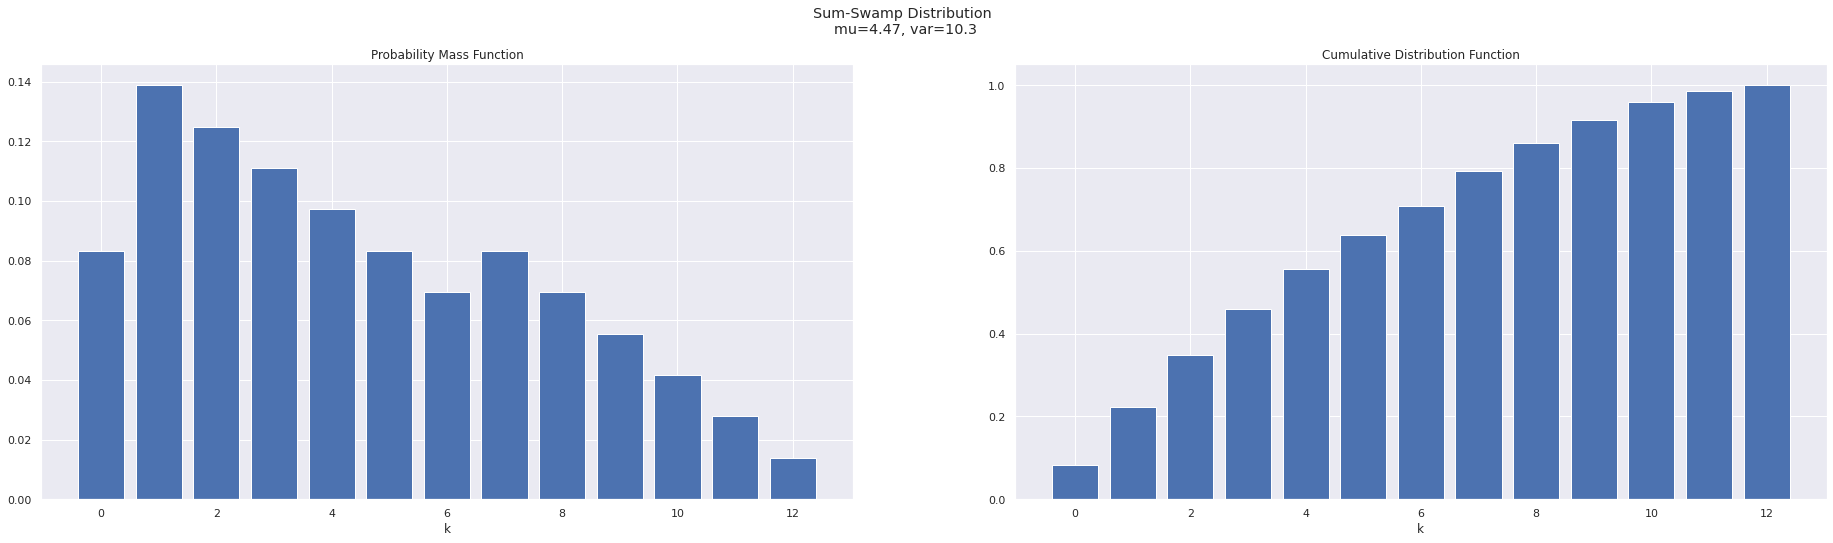

In [11]:
from itertools import accumulate

import matplotlib.pyplot as plt


N = 6
support = list(range(0, 2*N + 1))

distribution = list(map(prob_ss, support))
cdf = list(accumulate(distribution))

mu = sum(map(lambda x: x[0] * x[1], zip(support, distribution)))
var = sum(map(lambda x: x[0]* x[0] * x[1], zip(support, distribution))) - mu * mu



fig, axs = plt.subplots(1, 2, figsize=(32, 8))
fig.suptitle(f"Sum-Swamp Distribution \n{mu=:0.3}, {var=:0.3}")

axs[0].set_title('Probability Mass Function')
axs[0].set_xlabel('k')
axs[0].bar(support, distribution)

axs[1].set_title('Cumulative Distribution Function')
axs[1].set_xlabel('k')
axs[1].bar(support, cdf)

plt.show()

## Toy Problem

Before we solve the actual problem, let's solve an easier version. We do this by getting rid of the endless loop and the special spaces. To get rid of the endless loop we will remove the two spaces between the entrance and exit of the loop. This means our transition matrix will be $38$ x $38$ instead of $40$ x $40$. Because the real version allows for the "endless loops", the solution to this toy problem should be a lower bound to the real deal.


### Transition Matrix
Filling out the transisition matrix for the toy problem is fairly easy and only requires the probability functions we found earlier. The code below computes the transition matrix.

<AxesSubplot:>

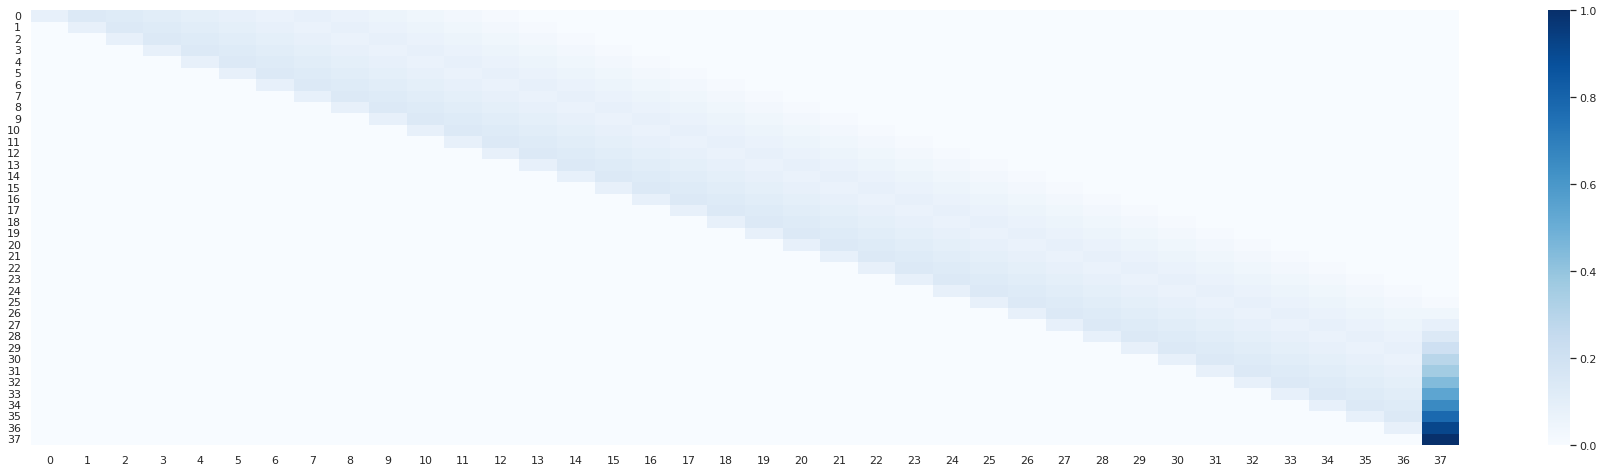

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize':(32,8)})

n = 38
toy_transition_matrix = [[0 for _ in range(n)] for _ in range(n)]

for i in range(n):
    for j in range(2*N + 1):
        k = min(i + j, n - 1)
        toy_transition_matrix[i][k] += distribution[j]



sns.heatmap(toy_transition_matrix, cmap="Blues")

### Stopping Time

If we let $m_i = E[\tau | \text{starting at state } i]$, the value we are trying to calculate is $m_0$. One thing to notice is that $m_{38} = 0$ because we are alerady at our destination. For any other state, we can calculate $m_i$ with the following recurrence relationship. 

$$m_i = 1 + \sum_{j = 0}^{38} m_j p_{ij} $$



In [13]:
import numpy as np
import numpy.typing as npt


def expected_tau(transition_matrix: npt.ArrayLike, max_iters: int = 10000) -> float:
    n = transition_matrix.shape[0]
    
    one = np.ones(n)
    one[n-1] = 0

    mask = np.zeros(n)
    mask[n-1] = 1

    k1 = np.zeros(n)
    k2 = one + transition_matrix.dot(k1)

    i = 0

    while (np.linalg.norm(k2 - k1) > 1e-6) and i < max_iters:
        k1 = k2
        k2 = one + transition_matrix.dot(k1)
        np.putmask(k2, mask, 0)
        i += 1

    return k2[0]


toy_transition_matrix = np.array(toy_transition_matrix)
toy_expected_tau = expected_tau(toy_transition_matrix)

toy_expected_tau

8.919775925551201

This means that without the special spots in the game a RB game should last about 9 turns. Intuitively, this makes sense because the expected number of turns times the expected number of spaces to move per roll should be close to the number of spaces that are on the board.


## Full Problem (Part I): n-Player RB and 2-Player NRB Games

These games are lumped together because the value we seek will be the same for all of them. More importantly, the method of calculation will be the same as in the toy problem. Namely, compute the expected hitting time given a transition matrix. All we really have to do to is modify the transition matrix to reflect the real game and then the problem is as good as done. The $n$-player NRB game is a bit different since it requires computing the distribution of the order statistics, but we will deal with that in the next section. 


### Transition Matrix
The difference with this transition matrix is that it will have more states and some of them must be treated in a special way. I wrote some [helper functions and classes](https://github.com/jiduque/sum-swamp/blob/main/sum_swamp.py) that can do the calculations for us on any similar board. In short, we initialize a `Board` object with a `BoardConfig`, where we add all the special spots, and then we run the `compute_transition_matrix` method to get the transition matrix of a game.

<AxesSubplot:>

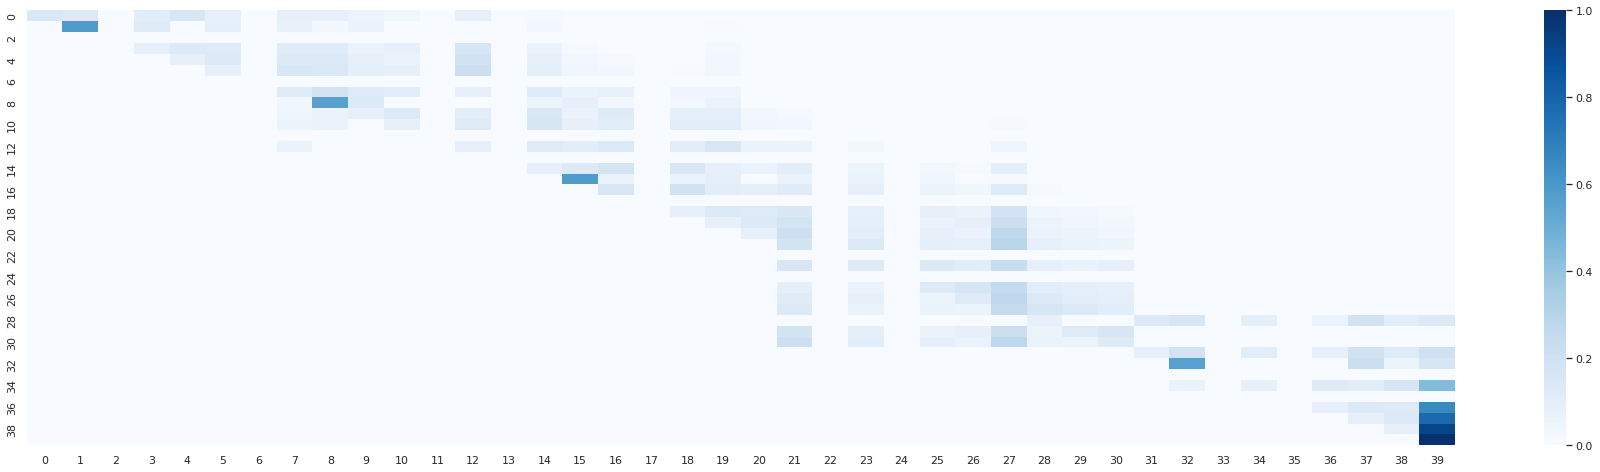

In [14]:
from sum_swamp import Loop, Parities, Shortcuts, BoardConfig, Dice, Game

sns.set(rc={'figure.figsize':(32,8)})

board_config = BoardConfig(
    n = 40, 
    parities = Parities(evens={1, 15}, odds={8, 32}),
    numbered = {
        2: 2,
        11: 3,
        13: 6,
        17: 1,
        22: 5,
        24: 3,
        35: 3
    },
    shortcuts = Shortcuts({6: 12, 33: 37}),
    loop = Loop(start=21, exit=28, end=30)
)
dice = Dice(distribution)


game_board = Game(board_config, dice)
game_board.compute_transition_matrix()

sns.heatmap(game_board.transition_matrix, cmap="Blues")

### Stopping Time

Since the code to calculate the stopping time works for general transition matrices, we can reuse it for this new transition matrix. I included this function in our helper functions. 

In [15]:
from sum_swamp import expected_tau

expected_tau(np.array(game_board.transition_matrix))

17.176283594973025

## Full-Problem (Part II): An Approximation for the Rest

To compute the value, $E[\max \{\tau_1, \tau_2, \tau_3\}]$ and $E[\max \{\tau_1, \tau_2\}]$, we will need to compute the distribution of $\tau$. We will approximate it this by doing Monte Carlo simulations using the transition matrix. 

### Confirming the Method Works
Before we use the method, we will confirm the method works by computing $E[\tau]$ for the toy problem and our actual problem and compare it to what we already computed. The benefit of using the monte carlo methods is that we can get a complete distribution of $\tau$, so we can also compute the standard deviation and other kinds of values.

In [16]:
import random
from collections import Counter


def simulate_game_length(transition_matrix):
    n = transition_matrix.shape[0]
    current_position, output = 0, 0
    possible_choices = list(range(n))
    
    while current_position < n - 1:
        probs = transition_matrix[current_position]
        current_position = random.choices(possible_choices, weights=probs)[0]
        output += 1
    
    return output


def simulate_tau_distribution(transition_matrix, n_games=1000000):
    output = Counter(
        map(
            lambda _: simulate_game_length(transition_matrix), 
            range(n_games)
        )
    )

    for key, val in output.items():
        output[key] = val / n_games

    return output

#### Toy Problem

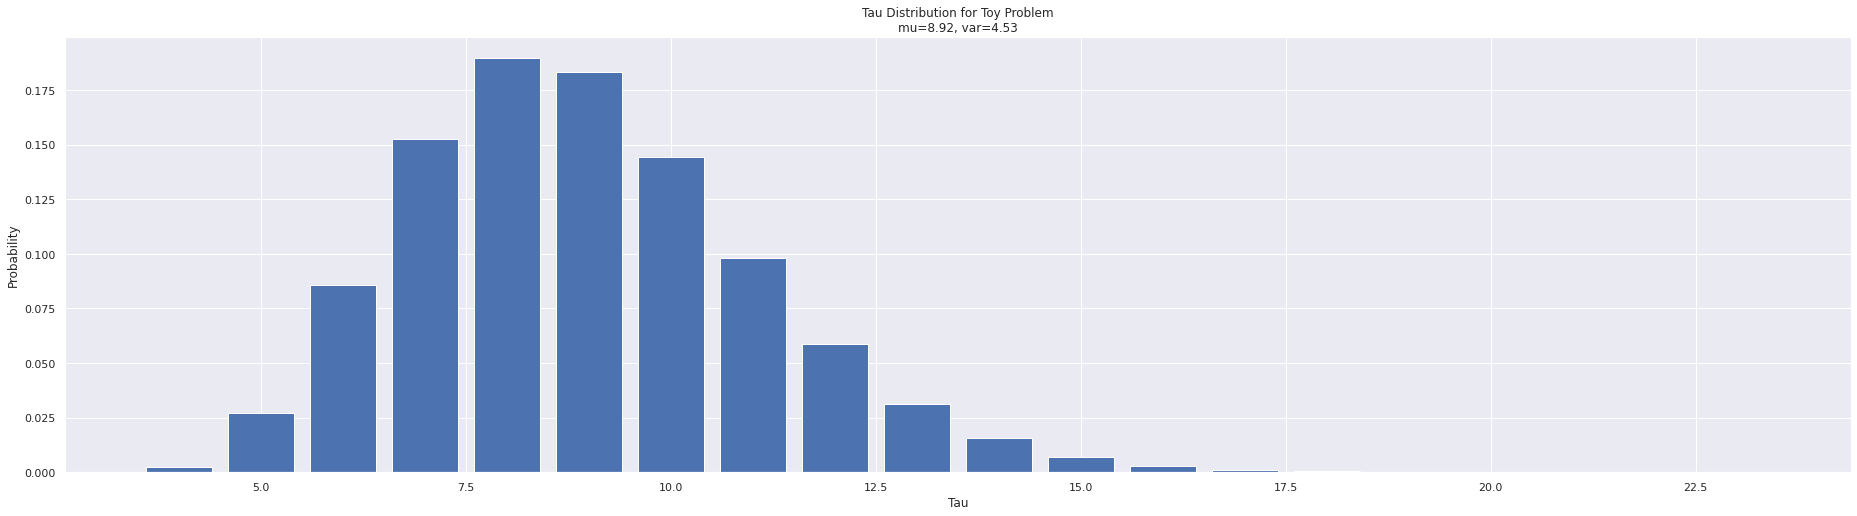

In [17]:
def plot_tau_distribution(distribution, plot_title):
    assert isinstance(distribution, (list, dict))

    plt.figure(figsize=(32, 8))
    
    x, y = list(range(len(distribution))), distribution
        
    if isinstance(distribution, dict):
        x, y = distribution.keys(), distribution.values()
    
    mu = sum( i * p for i, p in zip(x, y))
    var = sum( (i - mu) * (i - mu) * p for i, p in zip(x, y))
    
    plt.bar(x, y)
    plt.title(f"{plot_title.strip()}\n{mu=:0.3}, {var=:0.3}")
    plt.xlabel("Tau")
    plt.ylabel("Probability")
    plt.show()


plot_tau_distribution(
    simulate_tau_distribution(toy_transition_matrix),
    "Tau Distribution for Toy Problem"
)

#### Real Deal

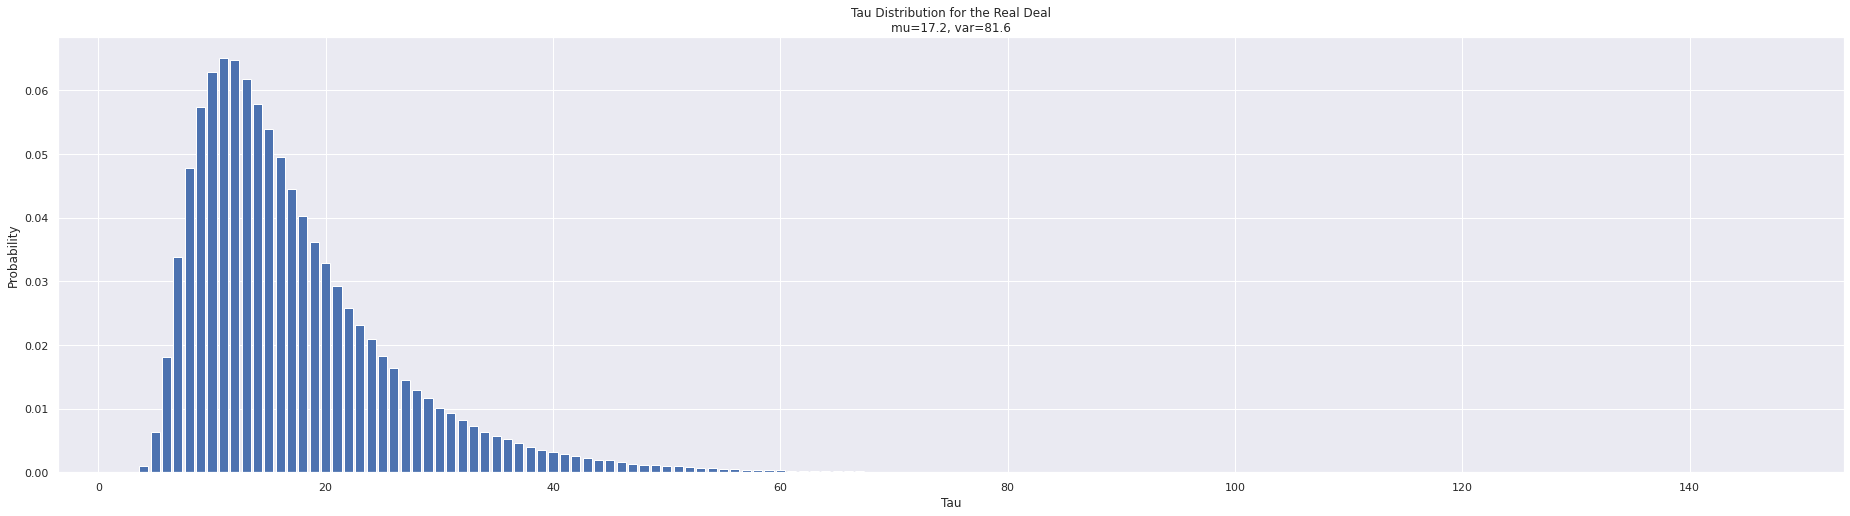

In [18]:
tau_dist = simulate_tau_distribution(np.array(game_board.transition_matrix))

plot_tau_distribution(tau_dist, "Tau Distribution for the Real Deal")

### Order Statistics

Now that we have a distribution for the finishing times, we can use it calculate the expected max value of $n$ players. Since each player's moves are independent of each other, their finishing times are as well. This lets us think of the total game time as the max of $n$ samples from the $\tau$ distribution. To calculate the expected max, we use some properties of [order statistics](https://en.wikipedia.org/wiki/Order_statistic). There we can see that the CDF of the max of $n$ samples is equal to the $\tau$ CDF to the power or $n$. Recalling that to get the probability distribution, we can just take the derivative of the CDF we get the following.

$$
p(\max\left[{\tau_1, \tau_2, ..., \tau_n}\right] = k) = n \left[ F(\tau = k) \right]^{n-1}p(\tau = k)
$$

where $F(\tau = k)$ is the CDF of the $\tau$ distribution and $p$ is the distribution. We can easily compute these values, and the results are summarized below.

In [19]:
from itertools import accumulate

max_tau = max(tau_dist)
cdf_tau = list(accumulate([tau_dist[x] for x in range(max_tau + 1)]))

#### $E[\max \{\tau_1, \tau_2\}]$

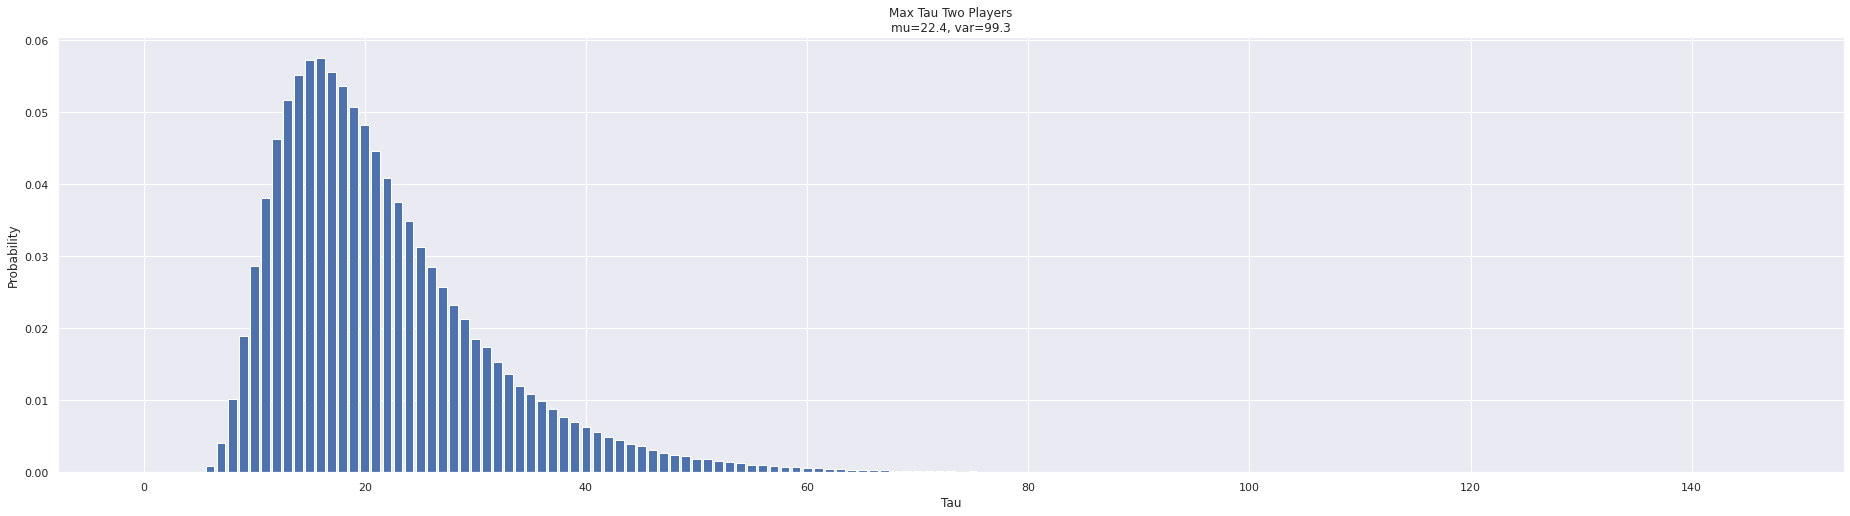

In [20]:
dist_max_two_tau_sample = list(
    map(
        lambda x: 2*cdf_tau[x]*tau_dist[x],  
        range(max_tau + 1)
    )
)

plot_tau_distribution(dist_max_two_tau_sample, "Max Tau Two Players")

#### $E[\max \{\tau_1, \tau_2, \tau_3\}]$

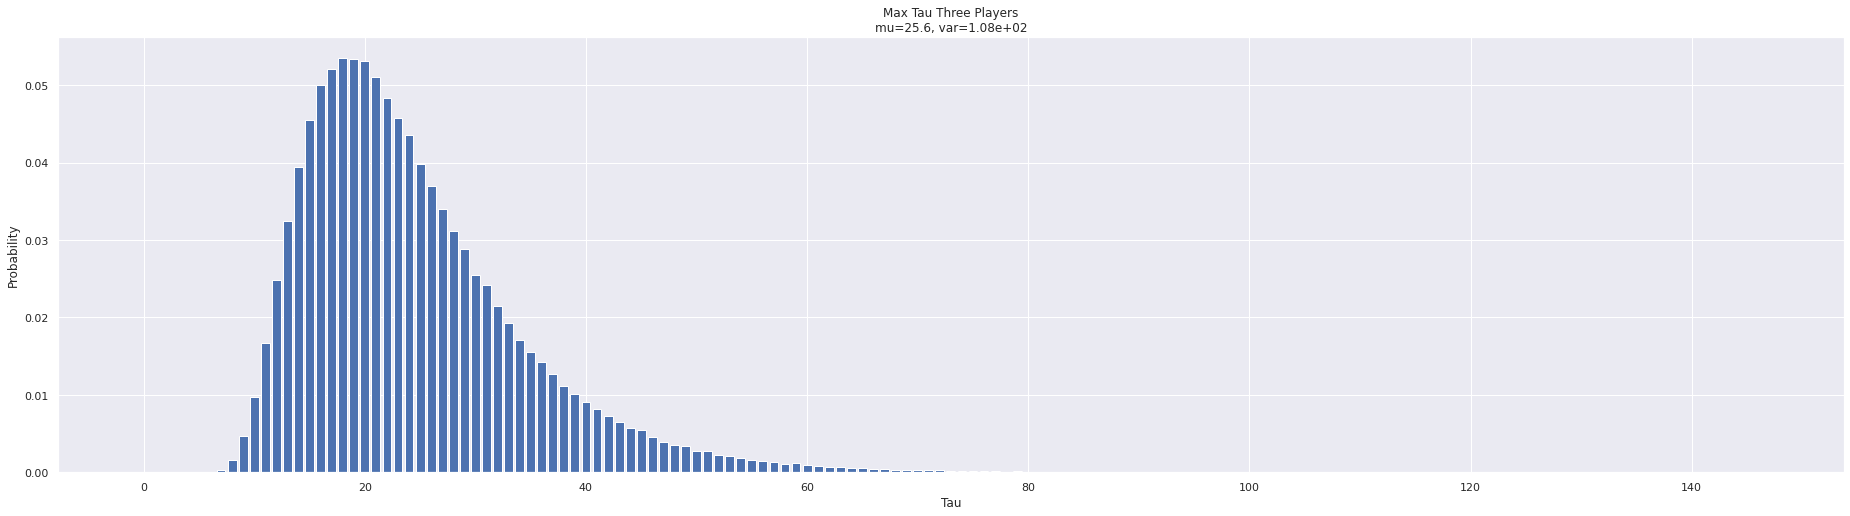

In [21]:
dist_max_three_tau_sample = list(
    map(
        lambda x: 3*cdf_tau[x]*cdf_tau[x]*tau_dist[x],  
        range(max_tau + 1)
    )
)

plot_tau_distribution(dist_max_three_tau_sample, "Max Tau Three Players")

## Conclusion

<table style="width:80%; text-align:center; float:center">
  <tr>
    <th>Number of Players</th>
    <th>RB Game Length</th>
    <th>NRB Game Length</th>
  </tr>
  <tr>
    <td>2</td>
    <td>17.1</td>
    <td>17.1</td>
  </tr>
  <tr>
    <td>3</td>
    <td>17.1</td>
    <td>22.4</td>
  </tr>
  <tr>
    <td>4</td>
    <td>17.1</td>
    <td>25.6</td>
  </tr>
</table>

The expected value doesn't change too much but this game has a large variance. So, this game can take forever so just go buy your kids some damn flash cards to teach them how to add and subtract.